# Fintopy #
## Pandas extensions for financial markets ##

In [95]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from xbbg import blp
import fintopy

plt.style.use('seaborn-darkgrid')

## Data ##

In [2]:
s = blp.bdh('MSFT US Equity', 'PX_LAST', '2021-01-01', '2021-01-31')
s.columns = s.columns.droplevel(1)
s = s.iloc[:, 0]
s.head()

2021-01-04    217.1898
2021-01-05    217.3993
2021-01-06    211.7623
2021-01-07    217.7884
2021-01-08    219.1153
Name: MSFT US Equity, dtype: float64

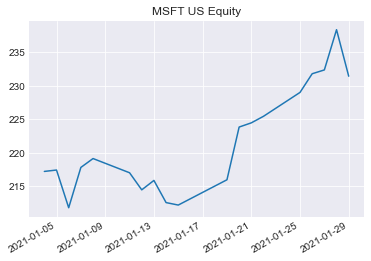

In [3]:
s.plot(title=s.name);

## Prices ##

### Set_frequency() ###

In [4]:
# Set the frequency of the series to Business Day
bdaily = s.prices.set_frequency()
bdaily

2021-01-04    217.1898
2021-01-05    217.3993
2021-01-06    211.7623
2021-01-07    217.7884
2021-01-08    219.1153
2021-01-11    216.9902
2021-01-12    214.4361
2021-01-13    215.8429
2021-01-14    212.5305
2021-01-15    212.1614
2021-01-18    212.1614
2021-01-19    215.9426
2021-01-20    223.8245
2021-01-21    224.4530
2021-01-22    225.4308
2021-01-25    229.0026
2021-01-26    231.7961
2021-01-27    232.3648
2021-01-28    238.3810
2021-01-29    231.4270
Freq: B, Name: MSFT US Equity, dtype: float64

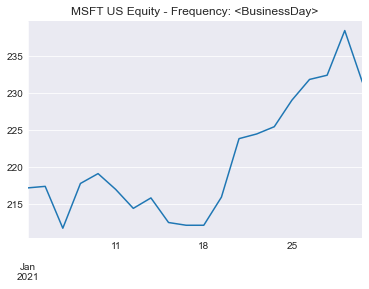

In [5]:
bdaily.plot(title=f'{bdaily.name} - Frequency: {bdaily.index.freq}');

In [6]:
# Set the frequency of the series to Business Week
bweekly = s.prices.set_frequency('BW')
bweekly

2021-01-08    219.1153
2021-01-15    212.1614
2021-01-22    225.4308
2021-01-29    231.4270
Freq: W-FRI, Name: MSFT US Equity, dtype: float64

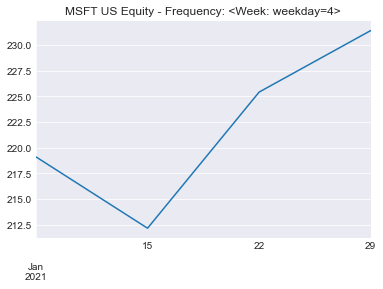

In [7]:
bweekly.plot(title=f'{bweekly.name} - Frequency: {bweekly.index.freq}');

### Rebase() ###

In [50]:
# Rebases the series starting from 200
rebased = s.prices.set_frequency().prices.rebase(base=200)
rebased.name = f'{s.name} rebased'
rebased.head()

2021-01-04    200.000000
2021-01-05    200.192919
2021-01-06    195.002067
2021-01-07    200.551223
2021-01-08    201.773104
Freq: B, Name: MSFT US Equity rebased, dtype: float64

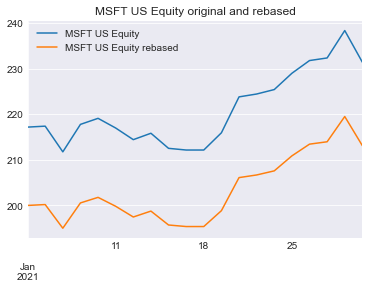

In [51]:
pd.concat((bdaily, rebased), axis=1).plot(title=f'{s.name} original and rebased');

### Log_returns() ###

In [10]:
# Daily log returns
lrdaily = s.prices.set_frequency().prices.log_returns()
lrdaily.head()

2021-01-04         NaN
2021-01-05    0.000964
2021-01-06   -0.026271
2021-01-07    0.028060
2021-01-08    0.006074
Freq: B, Name: MSFT US Equity, dtype: float64

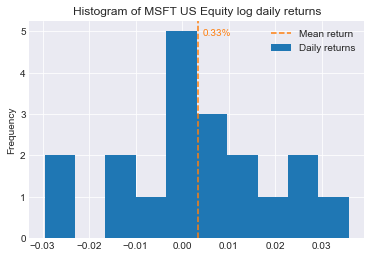

In [11]:
lrdaily.plot.hist(title=f'Histogram of {lrdaily.name} log daily returns', label='Daily returns');
plt.axvline(lrdaily.mean(), color='C1', linestyle='--', label='Mean return');
plt.text(lrdaily.mean() + 0.001, 4.9, f'{lrdaily.mean():.2%}', color='C1');
plt.legend();

### Pct_ returns() ###

In [12]:
# Weekly percent returns
prweekly = s.prices.set_frequency('BW').prices.pct_returns()
prweekly.head()

2021-01-08         NaN
2021-01-15   -0.031736
2021-01-22    0.062544
2021-01-29    0.026599
Freq: W-FRI, Name: MSFT US Equity, dtype: float64

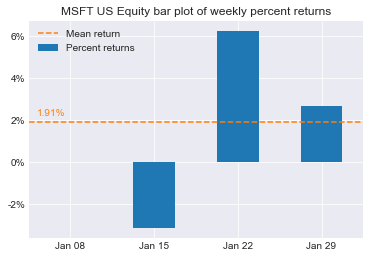

In [39]:
prweekly.plot.bar(title=f'{prweekly.name} bar plot of weekly percent returns', label='Percent returns');
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0%}'))
plt.gca().xaxis.set_major_formatter(mtick.FixedFormatter(prweekly.index.strftime('%b %d')))
plt.xticks(rotation='horizontal');
plt.axhline(prweekly.mean(), color='C1', linestyle='--', label='Mean return');
plt.text(-0.4, prweekly.mean() + 0.003, f'{prweekly.mean():.2%}', color='C1');
plt.legend();

### Abs_return() ###

In [41]:
print(f'Absolute return: {s.prices.abs_return():.2%}')

Absolute return: 6.56%


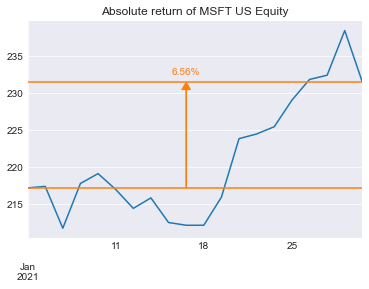

In [85]:
s.prices.set_frequency().plot(title=f'Absolute return of {s.name}');
plt.axhline(s.iat[0], color='C1')
plt.axhline(s.iat[-1], color='C1')
plt.arrow(s.index[9], s.iat[0], 0, s.iat[-1] - s.iat[0], color='C1', head_width=0.5, head_length=1, length_includes_head=True);
plt.text(s.index[9], s.iat[-1] + 1, f'{s.prices.abs_return():.2%}', color='C1', ha='center');

### Annualized_return() ###

In [86]:
print(f'Annualized return: {s.prices.annualized_return():.2%}')

Annualized return: 95.71%


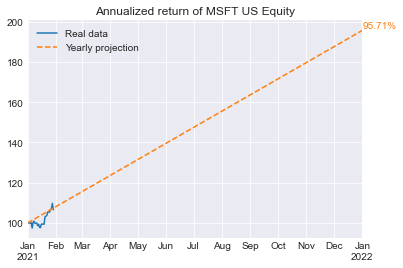

In [130]:
idx = pd.date_range('2021-01-01', periods=366)
sreal = s.prices.rebase().reindex(idx).fillna(method='bfill')
sreal.name = 'Real data'
returns = s.prices.abs_return() / (s.index[-1] - s.index[0]).days * (sr.index - sr.index[0]).days
stheor = pd.Series(index=idx, data=sreal.iat[0] * (1 + returns))
stheor.name = 'Yearly projection'
pd.concat((sreal, stheor), axis=1).plot(title=f'Annualized return of {s.name}', style=['-', '--']);
plt.text(stheor.index[-1], stheor.iat[-1] + 1, f'{s.prices.annualized_return():.2%}', color='C1');